# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

Hypotheses — brief descriptions of the hypotheses

Reach — user reach, on a scale of one to ten

Impact — impact on users, on a scale of one to ten

Confidence — confidence in the hypothesis, on a scale of one to ten

Effort — the resources required to test a hypothesis, on a scale of one to ten. 

The higher the Effort value, the more resource-intensive the test.

The task is to:
Apply the ICE framework to prioritize hypotheses.

Sort them in descending order of priority.

Apply the RICE framework to prioritize hypotheses. 

Sort them in descending order of priority.

Show how the prioritization of hypotheses changes when you use RICE instead of ICE. 

Provide an explanation for the changes.

## Prioritizing Hypotheses

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats


hypothesis_df=pd.read_csv('/Users/edeng/Downloads/hypotheses_us.csv', sep=';')
hypothesis_df.columns=hypothesis_df.columns.str.lower()
hypothesis_df

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
#calculating ICE
hypothesis_df['ICE']=(hypothesis_df['impact']*hypothesis_df['confidence'])/hypothesis_df['effort']
hypothesis_df[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [3]:
#calculating RICE
hypothesis_df['RICE']=(hypothesis_df['reach']*hypothesis_df['impact']*hypothesis_df['confidence'])/hypothesis_df['effort']
hypothesis_df[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


We can see that the ICE and RICE share the same top 5 hypothesis. The differnce in the ranking it due to the RICE reach of hypothesis 7 is the highest possible (10), while hypothesis 7 reach is 8 which rank these at the top two. The reason hypothesis 8 was downgraded to 5th place from 1st place in ICE, is due to the fact that it's reach is the lowest posssible (1).

In [4]:
#showing the hypothesis text
pd.set_option('display.max_colwidth', 500)
counter=0
for i in hypothesis_df['hypothesis']:
    print(f'hypothesis {counter}:', i)
    counter += 1

hypothesis 0: Add two new channels for attracting traffic. This will bring 30% more users
hypothesis 1: Launch your own delivery service. This will shorten delivery time
hypothesis 2: Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
hypothesis 3: Change the category structure. This will increase conversion since users will find the products they want more quickly
hypothesis 4: Change the background color on the main page. This will increase user engagement
hypothesis 5: Add a customer review page. This will increase the number of orders
hypothesis 6: Show banners with current offers and sales on the main page. This will boost conversion
hypothesis 7: Add a subscription form to all the main pages. This will help you compile a mailing list
hypothesis 8: Launch a promotion that gives users discounts on their birthdays


## A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [5]:
orders=pd.read_csv('/datasets/orders_us.csv')
visitors=pd.read_csv('/datasets/visits_us.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.info()
print()
visitors.info()

#checking if some of users are present in both groups

groups=orders.groupby(['visitorId', 'group'])['revenue'].sum().reset_index()
onBothGroups=groups[groups['visitorId'].duplicated()]

#dropping users that on both groups
orders=orders[~orders.visitorId.isin(onBothGroups.visitorId)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


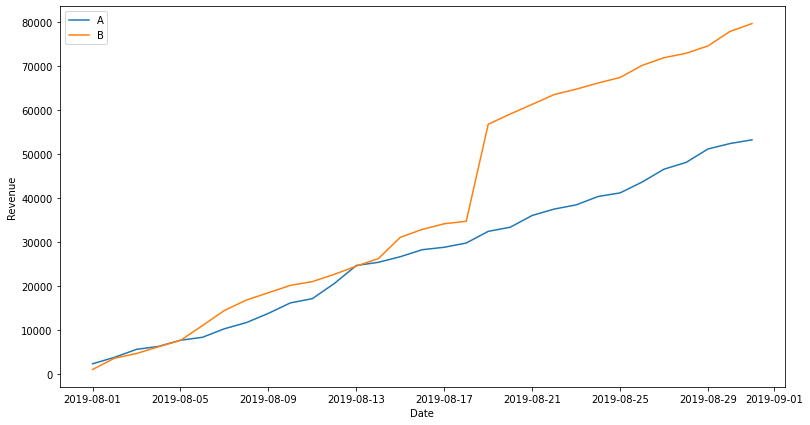

In [6]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(13, 7))

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.show()


Revenue is rising steadily throughout the whole test. That's a good sign.
However, we can see that both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample. 

### Graph cumulative average order size by group. Make conclusions and conjectures.


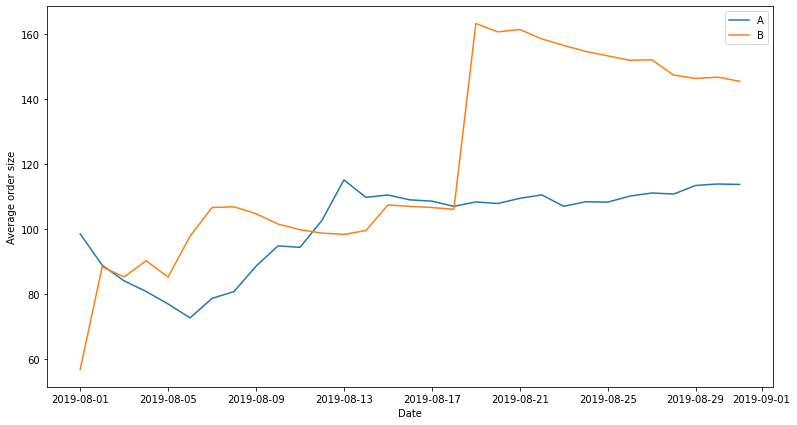

In [7]:
plt.figure(figsize=(13, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average order size')

plt.show()

Average order size stabilizes for group A and keeps on raising for group B. The surge in group B in the second half of the test may have been due to the presence of large, expensive orders. We need more data on this group to find the true average order size and establish its level.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.


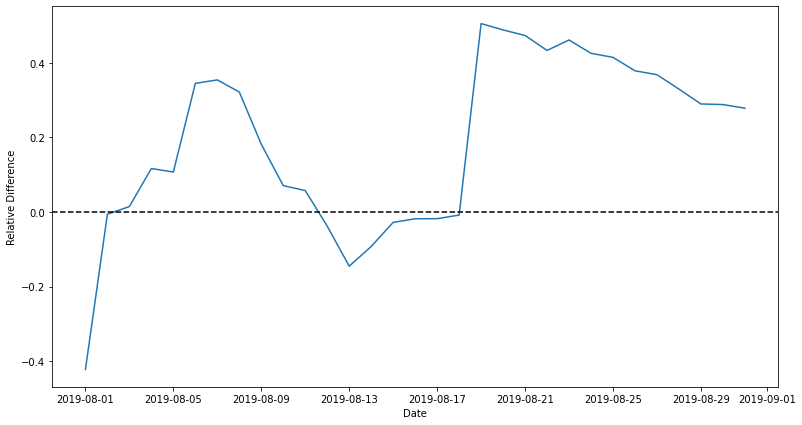

In [8]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(13, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Relative Difference')

plt.show()

At several points the difference between the segments spikes. This means there must be some big orders and outliers.


### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


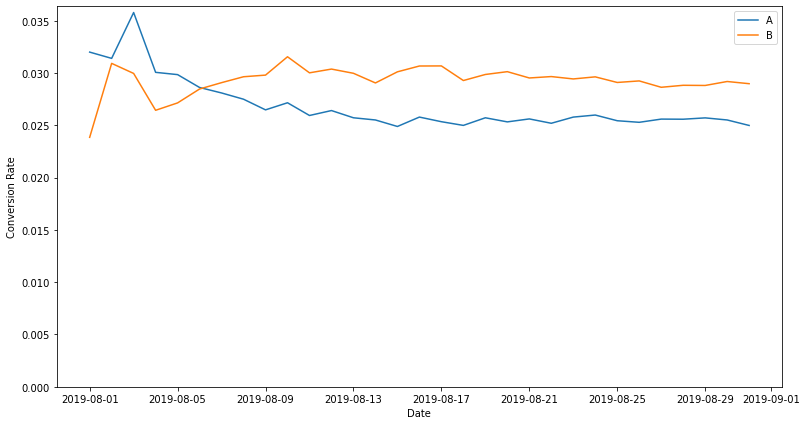

In [9]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(13, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.ylim(ymin=0)

plt.show()

The convertion rate for group B started below group A but later exceeded group A and stabilized, while A fell below and stabilized below B.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


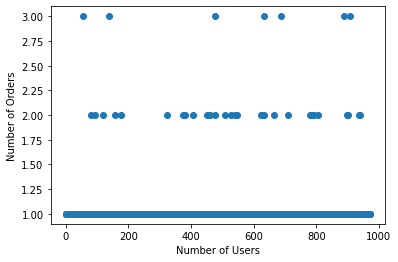

In [10]:
ordersByUser_df=orders.copy()
ordersByUsers = (
    ordersByUser_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Number of Users')
plt.ylabel('Number of Orders')

plt.show()

There are a lot of users with two to three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [11]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

No more than 5% of the number of orders is 1, and no more then 1% ordered more then 2.
Thus, it would be reasonable to set one order per user as the upper limit for the number of orders and to filter anomalies on that basis.


### Plot a scatter chart of order prices. Make conclusions and conjectures.


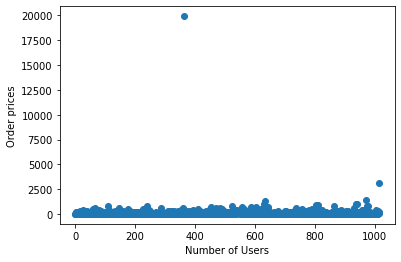

In [12]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Number of Users')
plt.ylabel('Order prices')

plt.show()

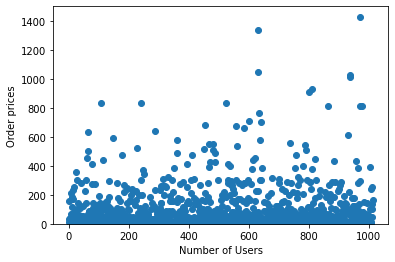

In [13]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Number of Users')
plt.ylabel('Order prices')
plt.ylim(0, 1500)
plt.show()


### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [14]:
np.percentile(orders['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

No more than 5% of orders cost more than 414.27. Thus, it  would be reasonable to set 414.27 order price as the lower limit for the order price and to filter anomalies on that basis.

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


In [15]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


The first row of the output gives us the p-value, 0.011, which is lower than 0.05. So we reject the null hypothesis meaning that there is a statistical significance between the groups. The relative gain of group B is 16% (the second row of the output).


### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


In [16]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.862
0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 


### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


As we saw that the 95th percentile for average order size, which I found in the preceding tasks, is 414. The 95th and 99th percentiles for the number of orders per user were 1 and 2 orders.
Let's define anomalous users as those who place more than one order or one order bigger than 414. Thus we'll remove the 5% of users with the largest numbers of orders and from 5% of the users with the most expensive orders.

In [17]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 414]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)
#we have 75 anomalous users in total.

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print()
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)

0.016
0.174


The results of the filtered data changed a little, but didn't change the outcome of the Null hypothesis.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


In [18]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.771
-0.033


The p-value increased slightly but now the difference between the segments is 3.3% instead of 27%.

### Conclusions and decisions

In conclusion we saw that there were users that appeared on both groups, so they were dropped. We also saw that large orders skewed our cumulative revenue by group data.

Nontheless, we saw that group B conversion rate is higher than group A, by 16% using the raw data and 17% when omitting outliers.

We also saw that only 1% of users ordered more than 2 orders, and no more than 5% of orders cost more than 414.

In addition, we found no statistical significance of the difference in average order size between the groups, however, due to outliers the difference in the mean between the groups is 27.8% higher in group B. After removing outliers the difference falls to 3.3% higher for group A.

Per the conclusion above, the test can be stop because as mentioned, there is a statistical difference in the conversion between the two groups where group B is leading with 16%, while there is no statistical difference in the average order size between the groups.